<a href="https://colab.research.google.com/github/SiarheiThor/IBM-Data-Science/blob/main/kaggle_knowledge/018_Digit_Recognizer_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"sergeyfedatsenka","key":"5eca23f782a35f03af3b3a9ad74e400a"}'}

In [ ]:
!mkdir ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle competitions download -c digit-recognizer

 33% 5.00M/15.3M [00:00<00:00, 47.8MB/s]
100% 15.3M/15.3M [00:00<00:00, 101MB/s] 


In [ ]:
! unzip digit-recognizer.zip

Archive:  digit-recognizer.zip
  inflating: sample_submission.csv   
  inflating: test.csv                
  inflating: train.csv               


### Importing the libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout, GlobalMaxPooling2D, BatchNormalization, MaxPooling2D, MaxPool2D
from tensorflow.keras.models import Model 



### Reading and transforming the data

In [ ]:
Train = pd.read_csv("train.csv")
Test = pd.read_csv("test.csv")

In [ ]:
# Y
y_train = Train['label'].values

#convert the images into a matrix of size 28 X 28 
X_train = Train.loc[:,Train.columns != 'label'].values
X_train = X_train.reshape(-1,28,28,1)
X_train.shape, y_train.shape


((42000, 28, 28, 1), (42000,))

In [ ]:
#converting the test data
X = Test.values
X = X.reshape(-1,28,28,1)
X.shape

(28000, 28, 28, 1)

### Checking some images

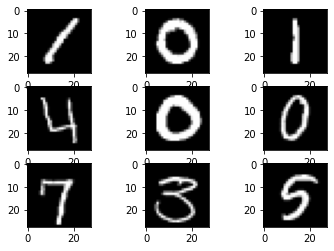

In [ ]:
import matplotlib.pyplot as plt

# create a grid of 3x3 images
for i in range(0, 9):
    plt.subplot(330 + 1 + i)
    plt.imshow(X_train[i].reshape(28,28), cmap=plt.get_cmap('gray'))
# show the plot
plt.show()

In [ ]:
### Normalizing the data

X_train = X_train.astype('float32') / 255
X = X.astype('float32') /255

In [ ]:
#from keras.utils import to_categorical
#y_train = to_categorical(y_train)
#test_labels = to_categorical(y_test)
#y_train.shape

(29400, 10)

In [ ]:
#Splitting the data

from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_train, y_train, test_size=0.3)



### Building a model using the functional Keras API

In [ ]:
K  = len(set(y_train))
print('Number of classes is: ', K)

Number of classes is:  10


In [ ]:
i = Input(shape=X_train[0].shape)
x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(i) #x = Conv2D(32, (3,3), strides = 2, activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(32, (3,3), padding = 'same', activation = 'relu')(x)#x = Conv2D(64, (3,3), strides = 2, activation = 'relu')(i)
x = BatchNormalization()(x)
x = MaxPool2D()(x)  #x = MaxPooling2D((2,2))(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)#x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(64, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x) #x = MaxPooling2D((2,2))(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)#x = Conv2D(128, (3,3), strides = 2, activation = 'relu')(i)
x = BatchNormalization()(x)
x = Conv2D(128, (3,3), padding = 'same', activation = 'relu')(x)
x = BatchNormalization()(x)
x = MaxPool2D()(x) #x = MaxPooling2D((2,2))(x)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation = 'relu')(x)
x = Dense(10, activation = 'softmax')(x)

model = Model(i,x)

In [ ]:
model.summary()

Model: "model_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_11 (InputLayer)       [(None, 28, 28, 1)]       0         
                                                                 
 conv2d_40 (Conv2D)          (None, 28, 28, 32)        320       
                                                                 
 batch_normalization_40 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 conv2d_41 (Conv2D)          (None, 28, 28, 32)        9248      
                                                                 
 batch_normalization_41 (Bat  (None, 28, 28, 32)       128       
 chNormalization)                                                
                                                                 
 max_pooling2d_28 (MaxPoolin  (None, 14, 14, 32)       0  

In [ ]:
# compile and fit the model
tf.random.set_seed(7)
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0005), loss = 'sparse_categorical_crossentropy', metrics=['accuracy'])
#r = model.fit(X_train,y_train, validation_data=(X_test,y_test),  epochs = 15)


Epoch 1/15
552/552 [==============================] - 5s 7ms/step - loss: 0.2272 - accuracy: 0.9354 - val_loss: 0.0867 - val_accuracy: 0.9738
Epoch 2/15
552/552 [==============================] - 4s 7ms/step - loss: 0.0678 - accuracy: 0.9788 - val_loss: 0.1135 - val_accuracy: 0.9669
Epoch 3/15
552/552 [==============================] - 4s 7ms/step - loss: 0.0508 - accuracy: 0.9841 - val_loss: 0.1059 - val_accuracy: 0.9708
Epoch 4/15
552/552 [==============================] - 4s 7ms/step - loss: 0.0400 - accuracy: 0.9868 - val_loss: 0.0556 - val_accuracy: 0.9832
Epoch 5/15
552/552 [==============================] - 4s 7ms/step - loss: 0.0324 - accuracy: 0.9892 - val_loss: 0.0554 - val_accuracy: 0.9843
Epoch 6/15
552/552 [==============================] - 4s 7ms/step - loss: 0.0301 - accuracy: 0.9902 - val_loss: 0.0695 - val_accuracy: 0.9816
Epoch 7/15
552/552 [==============================] - 4s 7ms/step - loss: 0.0212 - accuracy: 0.9927 - val_loss: 0.0798 - val_accuracy: 0.9812
Epoch 

### Creating some augmented data and fitting with fit_generetor

In [ ]:
from sklearn.utils import validation
# Fit with data augmentation
import tensorflow as tf

tf.random.set_seed(7)


batch_size = 32
data_generator  = tf.keras.preprocessing.image.ImageDataGenerator(width_shift_range=0.1,height_shift_range = 0.1, zoom_range=0.1) #, rotation_range = 5
train_generator = data_generator.flow(X_train, y_train, batch_size)
steps_per_epoch = X_train.shape[0] // batch_size
r = model.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=25)

Epoch 1/25


<ipython-input-92-2da8b6c33ef0>:12: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  r = model.fit_generator(train_generator, validation_data = (X_test, y_test), steps_per_epoch=steps_per_epoch, epochs=25)


551/551 [==============================] - 9s 15ms/step - loss: 0.2995 - accuracy: 0.9096 - val_loss: 0.1485 - val_accuracy: 0.9528
Epoch 2/25
551/551 [==============================] - 8s 15ms/step - loss: 0.1008 - accuracy: 0.9683 - val_loss: 0.0570 - val_accuracy: 0.9813
Epoch 3/25
551/551 [==============================] - 8s 14ms/step - loss: 0.0814 - accuracy: 0.9750 - val_loss: 0.0493 - val_accuracy: 0.9847
Epoch 4/25
551/551 [==============================] - 8s 14ms/step - loss: 0.0621 - accuracy: 0.9807 - val_loss: 0.0464 - val_accuracy: 0.9856
Epoch 5/25
551/551 [==============================] - 8s 14ms/step - loss: 0.0526 - accuracy: 0.9826 - val_loss: 0.0475 - val_accuracy: 0.9856
Epoch 6/25
551/551 [==============================] - 10s 17ms/step - loss: 0.0483 - accuracy: 0.9850 - val_loss: 0.0839 - val_accuracy: 0.9786
Epoch 7/25
551/551 [==============================] - 8s 15ms/step - loss: 0.0507 - accuracy: 0.9853 - val_loss: 0.0913 - val_accuracy: 0.9718
Epoch 8/2

### Visualizing the results

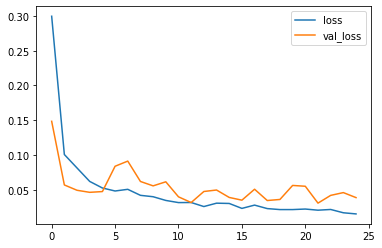

In [ ]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label = 'loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

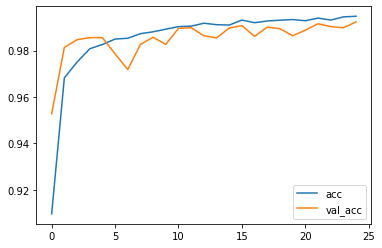

In [ ]:
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

237/237 [==============================] - 1s 2ms/step
[3 0 7 ... 1 5 7] [3, 0, 7, 0, 5, 0, 4, 5, 5, 2, 1, 0, 0, 7, 4, 8, 8, 8, 4, 0, 5, 4, 6, 6, 2, 4, 7, 2, 5, 9, 2, 3, 9, 3, 0, 7, 6, 8, 7, 4, 4, 9, 6, 8, 9, 1, 9, 6, 2, 6, 7, 6, 8, 9, 5, 8, 7, 3, 7, 5, 9, 7, 2, 8, 6, 1, 7, 6, 1, 2, 7, 4, 8, 1, 3, 5, 1, 4, 4, 7, 3, 1, 0, 7, 0, 7, 1, 7, 2, 0, 6, 5, 4, 4, 4, 0, 4, 0, 7, 1, 1, 6, 9, 1, 5, 5, 7, 0, 8, 2, 7, 8, 4, 1, 6, 7, 0, 2, 4, 5, 2, 1, 5, 1, 1, 7, 1, 4, 6, 7, 2, 1, 0, 8, 6, 8, 8, 4, 6, 4, 7, 6, 5, 2, 2, 6, 9, 2, 9, 8, 8, 9, 2, 1, 8, 8, 3, 7, 6, 9, 6, 2, 8, 0, 8, 5, 3, 6, 6, 2, 8, 1, 1, 5, 1, 1, 2, 6, 3, 5, 8, 9, 1, 3, 5, 0, 6, 9, 2, 9, 0, 6, 6, 5, 9, 0, 2, 5, 0, 2, 1, 6, 0, 3, 7, 2, 6, 4, 4, 1, 8, 3, 3, 7, 6, 6, 4, 6, 6, 7, 1, 6, 3, 5, 1, 3, 9, 3, 7, 5, 4, 4, 5, 6, 1, 6, 6, 6, 2, 4, 0, 0, 1, 7, 1, 8, 1, 0, 1, 1, 6, 3, 2, 4, 7, 8, 6, 6, 9, 7, 5, 9, 0, 2, 0, 3, 2, 9, 3, 9, 1, 4, 9, 1, 8, 2, 0, 6, 9, 4, 9, 6, 7, 4, 6, 1, 6, 1, 3, 9, 9, 2, 4, 9, 3, 1, 1, 4, 5, 3, 8, 9, 1, 3, 0, 0, 9, 0, 8,

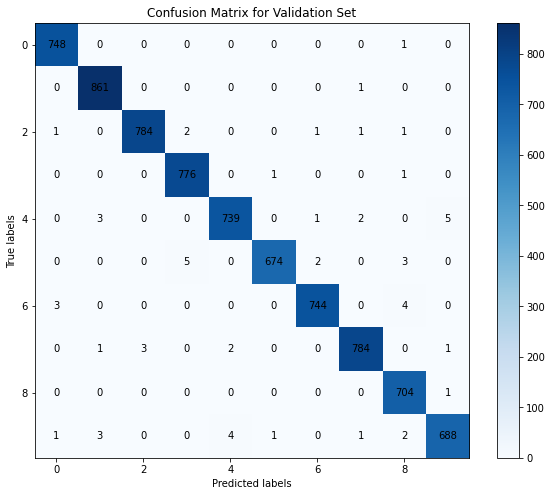

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
tf.random.set_seed(7)

# Generate predictions for the validation set
y_test_pred = model.predict(X_test)

# Convert the predictions and true labels to binary arrays
#y_test = np.argmax(y_test, axis=1)
y_test_pred = [np.argmax(y, axis=None, out=None) for y in y_test_pred]

print(y_test, y_test_pred)

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_test_pred)

# Plot the confusion matrix as a heatmap
plt.figure(figsize=(10, 8))
plt.imshow(cm, cmap='Blues')
plt.colorbar()
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.title("Confusion Matrix for Validation Set")

# Add text annotations for each cell in the heatmap
for i in range(10):
    for j in range(10):
        text = plt.text(j, i, cm[i, j], ha="center", va="center", color="black")

plt.show()

In [ ]:
tf.random.set_seed(7)
pred = model.predict(X)

875/875 [==============================] - 2s 2ms/step


In [ ]:
pred.shape

(28000, 10)

In [ ]:

#Convert the results to the digits value 
y_classes = [np.argmax(y, axis=None, out=None) for y in pred]

In [ ]:
x = list(range(1, 28001))
df = pd.DataFrame({'ImageId' :x,'Label':y_classes})
df.to_csv("CNN_prediction_v7.csv",index=False)

In [ ]:
df.head()

,ImageId,Label
0,1,2
1,2,0
2,3,9
3,4,0
4,5,3


In [ ]:
!kaggle competitions submit -c digit-recognizer -f CNN_prediction_v7.csv -m "CNN with tenserflow v6 with Batch Normalization, maxpolling2D and data augmentation, adding Dropout"

100% 208k/208k [00:03<00:00, 58.9kB/s]
Successfully submitted to Digit Recognizer